# Report：构建两层神经网络分类器

程子琛 19307110417

github repo 链接：https://github.com/chenghengheng/CV-HW1

模型网盘下载地址：https://pan.baidu.com/s/13y9jsssU02S-49trdoJY3g?pwd=oknu

## 模型训练

### 数据集
采用mnist数据集，训练集大小$60000*28*28$，测试集大小$10000*28*28$。

为方便后续计算，对原始数据作以下处理：

- Reshape：将每个样本对应的$28*28$的数据改写为$784*1$格式
- Standardize：对测试集进行归一化，并用测试集的均值和方差处理训练集
- Expand：训练过程中，将测试集的分类扩展为矩阵形式，矩阵的第$i$行对应$X_i$的分类，第$j$列为$1$对应真实标签，其他列都为0

### 训练
按标准正态分布随机设置初始的权重和偏置，通过随机梯度下降$(SGD)$方法更新参数。

设置$100000$次迭代，每次随机选择一组$\{X_i,y_i\}$，计算当前参数下的loss，根据梯度更新$w,b$
$$
w=w-stepsize*gradient(w)\\
b=b-stepsize*gradient(b)
$$

- 激活函数：使用$tanh()$作为激活函数

- loss：采用交叉熵损失函数
  $$
  L=\frac{1}{N}\sum_i-log(p(y_i))
  $$

- 反向传播：输出层的误差项为$2*(\hat y-y)$，根据反向传播算法，前一层的误差项为$f'(z)\bigodot (W^T\delta)$

- 梯度计算：上一层的激活值*误差项

- 学习率下降策略：学习率按余弦函数下降

- L2正则化：为方便计算与编程，将正则化部分设置在对参数的更新中，在梯度项部分加上$\lambda w$

- 保存模型：应用`numpy.savetxt`函数将参数保存为txt文件，应用模型时通过`numpy.loadtxt`导入参数

## 代码说明

`para2.py`将训练过程封装为函数，通过修改变量调整学习率，隐藏层大小，正则化强度。

具体函数说明详见代码注释部分。

本文件`parameter&test.ipynb`包括参数查找，模型测试，可视化训练及测试`Loss`，最终测试精度和对网络参数的可视化。

In [1]:
from para2 import *
import tensorflow as tf
import numpy as np
import random
import math

In [2]:
np.random.seed(1)
random.seed(1)

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
n, d = x_train.shape[0], x_train.shape[1]
d = d * d
x_train = x_train.reshape(n, d)

t, d1 = x_test.shape[0], x_test.shape[1]
d1 = d1 * d1
x_test = x_test.reshape(t, d1)

In [5]:
nLabels = max(y_train) + 1
yExpanded = binary(y_train, nLabels)
ytExpanded = binary(y_test, nLabels)

X, mu, sigma = standardize(x_train)
Xtest = standardize_(x_test, mu, sigma)

以上为数据处理部分

## 参数查找

In [6]:
loss1, loss2, test = para(0.001, [50], 0.05, X, y_train, n, d, Xtest, y_test, t, nLabels, yExpanded, 1)

Train iteration = 0, training error = 0.846717, test error = 0.847000
Train iteration = 5000, training error = 0.432450, test error = 0.430100
Train iteration = 10000, training error = 0.143167, test error = 0.138800
Train iteration = 15000, training error = 0.121550, test error = 0.122200
Train iteration = 20000, training error = 0.115267, test error = 0.108900
Train iteration = 25000, training error = 0.110283, test error = 0.105800
Train iteration = 30000, training error = 0.110067, test error = 0.106400
Train iteration = 35000, training error = 0.112817, test error = 0.112500
Train iteration = 40000, training error = 0.109667, test error = 0.104700
Train iteration = 45000, training error = 0.104567, test error = 0.104500
Train iteration = 50000, training error = 0.113783, test error = 0.110900
Train iteration = 55000, training error = 0.108983, test error = 0.107900
Train iteration = 60000, training error = 0.101267, test error = 0.097400
Train iteration = 65000, training error = 0

In [7]:
loss1 = np.array(loss1)
loss2 = np.array(loss2)
test = np.array(test)

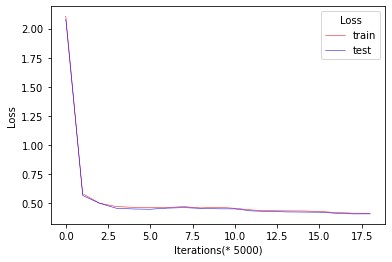

In [8]:
x = np.arange(19)
plt.plot(x, loss1, color="red", label="train",linewidth=0.5)
plt.plot(x, loss2, color="blue", label="test",linewidth=0.5)
plt.legend(title="Loss")
plt.xlabel('Iterations(* 5000)')
plt.ylabel('Loss')
plt.show()

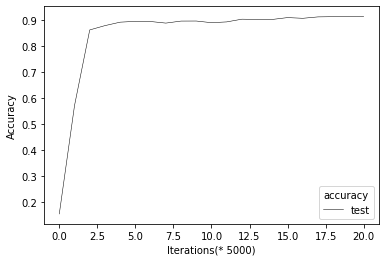

In [9]:
y = np.arange(21)
plt.plot(y, 1-test, color="black", label="test",linewidth=0.5)
plt.legend(title="accuracy")
plt.xlabel('Iterations(* 5000)')
plt.ylabel('Accuracy')
plt.show()

初始参数：初始学习率为$0.001$，隐藏层大小为$50$，正则化强度$0.05$。

`Loss`及`accuracy`曲线如上图，收敛较快。

以下，对隐藏层大小作调整测试。

In [10]:
loss1, loss2, test = para(0.001, [100], 0.05, X, y_train, n, d, Xtest, y_test, t, nLabels, yExpanded, 2)

Train iteration = 0, training error = 0.941617, test error = 0.943400
Train iteration = 5000, training error = 0.365250, test error = 0.360300
Train iteration = 10000, training error = 0.135650, test error = 0.128800
Train iteration = 15000, training error = 0.139033, test error = 0.141600
Train iteration = 20000, training error = 0.113633, test error = 0.110200
Train iteration = 25000, training error = 0.111683, test error = 0.105800
Train iteration = 30000, training error = 0.108667, test error = 0.102700
Train iteration = 35000, training error = 0.115317, test error = 0.115400
Train iteration = 40000, training error = 0.106650, test error = 0.100500
Train iteration = 45000, training error = 0.105283, test error = 0.104900
Train iteration = 50000, training error = 0.113667, test error = 0.110000
Train iteration = 55000, training error = 0.108333, test error = 0.106800
Train iteration = 60000, training error = 0.098650, test error = 0.094700
Train iteration = 65000, training error = 0

In [11]:
loss1 = np.array(loss1)
loss2 = np.array(loss2)
test = np.array(test)

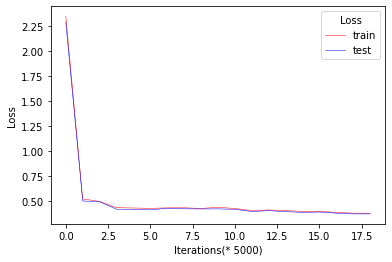

In [12]:
x = np.arange(19)
plt.plot(x, loss1, color="red", label="train",linewidth=0.5)
plt.plot(x, loss2, color="blue", label="test",linewidth=0.5)
plt.legend(title="Loss")
plt.xlabel('Iterations(* 5000)')
plt.ylabel('Loss')
plt.show()

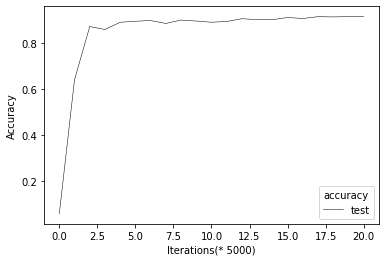

In [13]:
y = np.arange(21)
plt.plot(y, 1-test, color="black", label="test",linewidth=0.5)
plt.legend(title="accuracy")
plt.xlabel('Iterations(* 5000)')
plt.ylabel('Accuracy')
plt.show()

In [14]:
loss1, loss2, test = para(0.001, [200], 0.05, X, y_train, n, d, Xtest, y_test, t, nLabels, yExpanded, 3)

Train iteration = 0, training error = 0.920183, test error = 0.917400
Train iteration = 5000, training error = 0.311400, test error = 0.302800
Train iteration = 10000, training error = 0.135833, test error = 0.131100
Train iteration = 15000, training error = 0.154800, test error = 0.153100
Train iteration = 20000, training error = 0.131200, test error = 0.127600
Train iteration = 25000, training error = 0.118850, test error = 0.112200
Train iteration = 30000, training error = 0.113500, test error = 0.111000
Train iteration = 35000, training error = 0.123300, test error = 0.122000
Train iteration = 40000, training error = 0.111333, test error = 0.105100
Train iteration = 45000, training error = 0.117817, test error = 0.115000
Train iteration = 50000, training error = 0.122550, test error = 0.118400
Train iteration = 55000, training error = 0.112517, test error = 0.109200
Train iteration = 60000, training error = 0.102733, test error = 0.097700
Train iteration = 65000, training error = 0

随着隐藏层大小从50增加到100，精度提升，隐藏层大小增加至200时，模型训练时长明显增加，但训练结果无改善。

`Loss`及`accuracy`曲线如上图，收敛较快。

以下，对正则化强度作调整测试。

In [15]:
loss1, loss2, test = para(0.001, [100], 0.1, X, y_train, n, d, Xtest, y_test, t, nLabels, yExpanded, 5)

Train iteration = 0, training error = 0.941617, test error = 0.943400
Train iteration = 5000, training error = 0.163983, test error = 0.157100
Train iteration = 10000, training error = 0.144950, test error = 0.133700
Train iteration = 15000, training error = 0.172933, test error = 0.170700
Train iteration = 20000, training error = 0.138617, test error = 0.133500
Train iteration = 25000, training error = 0.132800, test error = 0.125800
Train iteration = 30000, training error = 0.124000, test error = 0.116900
Train iteration = 35000, training error = 0.153317, test error = 0.152600
Train iteration = 40000, training error = 0.128050, test error = 0.119300
Train iteration = 45000, training error = 0.125850, test error = 0.125500
Train iteration = 50000, training error = 0.134350, test error = 0.129300
Train iteration = 55000, training error = 0.130850, test error = 0.127500
Train iteration = 60000, training error = 0.119050, test error = 0.112800
Train iteration = 65000, training error = 0

In [16]:
loss1, loss2, test = para(0.001, [100], 0.01, X, y_train, n, d, Xtest, y_test, t, nLabels, yExpanded, 6)

Train iteration = 0, training error = 0.941617, test error = 0.943400
Train iteration = 5000, training error = 0.625883, test error = 0.613000
Train iteration = 10000, training error = 0.432150, test error = 0.421300
Train iteration = 15000, training error = 0.325700, test error = 0.314900
Train iteration = 20000, training error = 0.256183, test error = 0.254900
Train iteration = 25000, training error = 0.210333, test error = 0.210700
Train iteration = 30000, training error = 0.173817, test error = 0.175300
Train iteration = 35000, training error = 0.149717, test error = 0.154600
Train iteration = 40000, training error = 0.124683, test error = 0.124200
Train iteration = 45000, training error = 0.103650, test error = 0.108700
Train iteration = 50000, training error = 0.095117, test error = 0.095800
Train iteration = 55000, training error = 0.082033, test error = 0.087100
Train iteration = 60000, training error = 0.075233, test error = 0.077400
Train iteration = 65000, training error = 0

In [17]:
loss1 = np.array(loss1)
loss2 = np.array(loss2)
test = np.array(test)

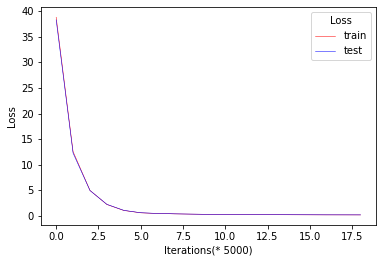

In [18]:
x = np.arange(19)
plt.plot(x, loss1, color="red", label="train",linewidth=0.5)
plt.plot(x, loss2, color="blue", label="test",linewidth=0.5)
plt.legend(title="Loss")
plt.xlabel('Iterations(* 5000)')
plt.ylabel('Loss')
plt.show()

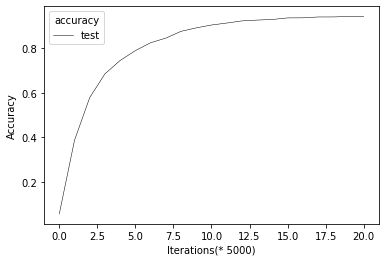

In [19]:
y = np.arange(21)
plt.plot(y, 1-test, color="black", label="test",linewidth=0.5)
plt.legend(title="accuracy")
plt.xlabel('Iterations(* 5000)')
plt.ylabel('Accuracy')
plt.show()

可以看出，本组参数在训练集的准确率有明显提升。

`Loss`及`accuracy`曲线如上图，初始收敛较慢，但收敛结果更好。

最终测试错误率为$0.056500$.

以下，对初始步长（学习率）作调整测试。

In [20]:
loss1, loss2, test = para(0.01, [100], 0.01, X, y_train, n, d, Xtest, y_test, t, nLabels, yExpanded, 7)

Train iteration = 0, training error = 0.941617, test error = 0.943400
Train iteration = 5000, training error = 0.312133, test error = 0.311500
Train iteration = 10000, training error = 0.281550, test error = 0.263700
Train iteration = 15000, training error = 0.298233, test error = 0.297400
Train iteration = 20000, training error = 0.327200, test error = 0.316400
Train iteration = 25000, training error = 0.260167, test error = 0.255800
Train iteration = 30000, training error = 0.404417, test error = 0.391100
Train iteration = 35000, training error = 0.279950, test error = 0.279200
Train iteration = 40000, training error = 0.236367, test error = 0.221700
Train iteration = 45000, training error = 0.221333, test error = 0.215400
Train iteration = 50000, training error = 0.255833, test error = 0.233400
Train iteration = 55000, training error = 0.215367, test error = 0.207700
Train iteration = 60000, training error = 0.217450, test error = 0.214700
Train iteration = 65000, training error = 0

In [21]:
loss1, loss2, test = para(0.0001, [100], 0.01, X, y_train, n, d, Xtest, y_test, t, nLabels, yExpanded, 8)

Train iteration = 0, training error = 0.941617, test error = 0.943400
Train iteration = 5000, training error = 0.924150, test error = 0.924100
Train iteration = 10000, training error = 0.903517, test error = 0.900200
Train iteration = 15000, training error = 0.872533, test error = 0.871200
Train iteration = 20000, training error = 0.836667, test error = 0.831500
Train iteration = 25000, training error = 0.792467, test error = 0.786500
Train iteration = 30000, training error = 0.755300, test error = 0.750600
Train iteration = 35000, training error = 0.724417, test error = 0.717500
Train iteration = 40000, training error = 0.694567, test error = 0.686800
Train iteration = 45000, training error = 0.667750, test error = 0.659300
Train iteration = 50000, training error = 0.644600, test error = 0.638300
Train iteration = 55000, training error = 0.623333, test error = 0.617000
Train iteration = 60000, training error = 0.605567, test error = 0.598400
Train iteration = 65000, training error = 0

经参数查找，表现较好的一组参数是

初始学习率为$0.001$，隐藏层大小为$100$，正则化强度$0.01$。

## 测试

导入模型，用经过参数查找的模型进行测试，输出分类精度。

In [22]:
np.random.seed(1)
random.seed(1)

nHidden = [100]

w = np.loadtxt("weights_100 hidden_0.001000 step_0.010000 lambda.txt")  # 导入模型
b = np.loadtxt("bias_100 hidden_0.001000 step_0.010000 lambda.txt")

yhat1 = predict(w, b, X, nHidden, nLabels)  # 测试模型
print("Training error with final model = %f" % (sum(yhat1 != y_train) / n))

yhat2 = predict(w, b, Xtest, nHidden, nLabels)
print("Test error with final model = %f" % (sum(yhat2 != y_test) / t))

acc = 1 - (sum(yhat2 != y_test) / t)
print("\nTest accuracy with final model = %f" % acc)  # 测试精度


Training error with final model = 0.052800
Test error with final model = 0.056500

Test accuracy with final model = 0.943500


In [23]:
import matplotlib.pyplot as plt

w = np.loadtxt("weights_100 hidden_0.001000 step_0.010000 lambda.txt")
w1 = w[:78400].reshape(100, 28, 28)
w2 = w[78400:].reshape(10, 10, 10)

## 网络参数可视化

对最优模型的参数进行可视化操作。

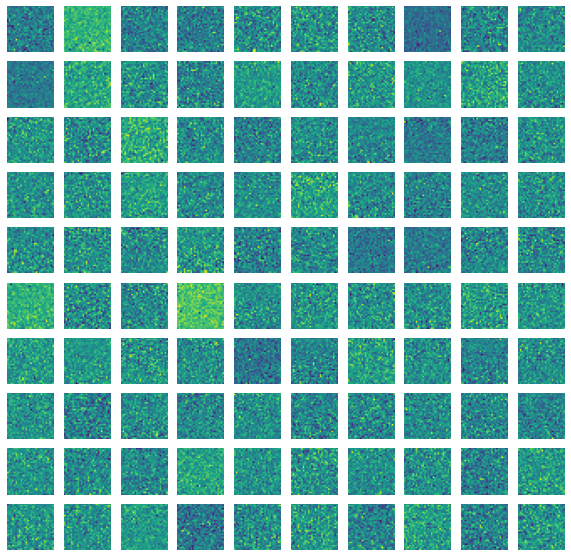

In [24]:
plt.figure(figsize=(10, 10))
for x in range(100):
    plt.subplot(10, 10, x + 1)
    plt.imshow(w1[x, :, :])
    plt.axis("off")

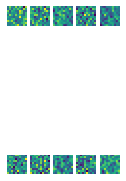

In [25]:
plt.figure(figsize=(2, 5))
for x in range(10):
    plt.subplot(2, 5, x + 1)
    plt.imshow(w2[x, :, :])
    plt.axis("off")